## Graphs and plots for the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.similarity import SpectralClustering
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [3]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

In [4]:
def plot_mean_shift(data, labels, results, bandwidth, outliers, save=None, name = 'images/meanshiftpaper.png'): 
 
    f, axarr = plt.subplots(1,4, figsize=(30,8))

    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[0].axis('off')

    axarr[3].scatter(data[:,0],data[:,1],alpha=.6, c = labels, cmap='Set2')
    if outliers >0:
        axarr[3].axis('off')
    else:
        axarr[3].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
        axarr[3].axis('off')   
    
    [X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
    ma=np.max(np.max(Z)) #max of density
    mi=np.min(np.min(Z)) #min of density
    levels=0.8*np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
    axarr[1].contour(X,Y,Z, levels)
    axarr[1].scatter(data[:,0],data[:,1],alpha=.08)
    #axarr[1].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
    axarr[1].axis('off')
    
    axarr[2].contour(X,Y,Z, levels)
    #axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=1, alpha=1)
    #axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
    axarr[2].scatter(results[:,0], results[:,1],alpha=1)
    axarr[2].axis('off')  
    
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[3].set_title('Clustering', fontsize=fontsizeset)
    axarr[2].set_title('Shifted points', fontsize=fontsizeset)
    axarr[1].set_title('Kernel density estimation', fontsize=fontsizeset)

    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

116 iterations until termination.
Used bandwidth: 0.250000
Finished after 4.252399890261474
Number of clusters found: 11.000000
There is/are 2.000000 outliers
Max within cluster distance to center: 0.165079
Mean within cluster distance to center: 0.002562
Sum of within cluster squared errors: 0.064314


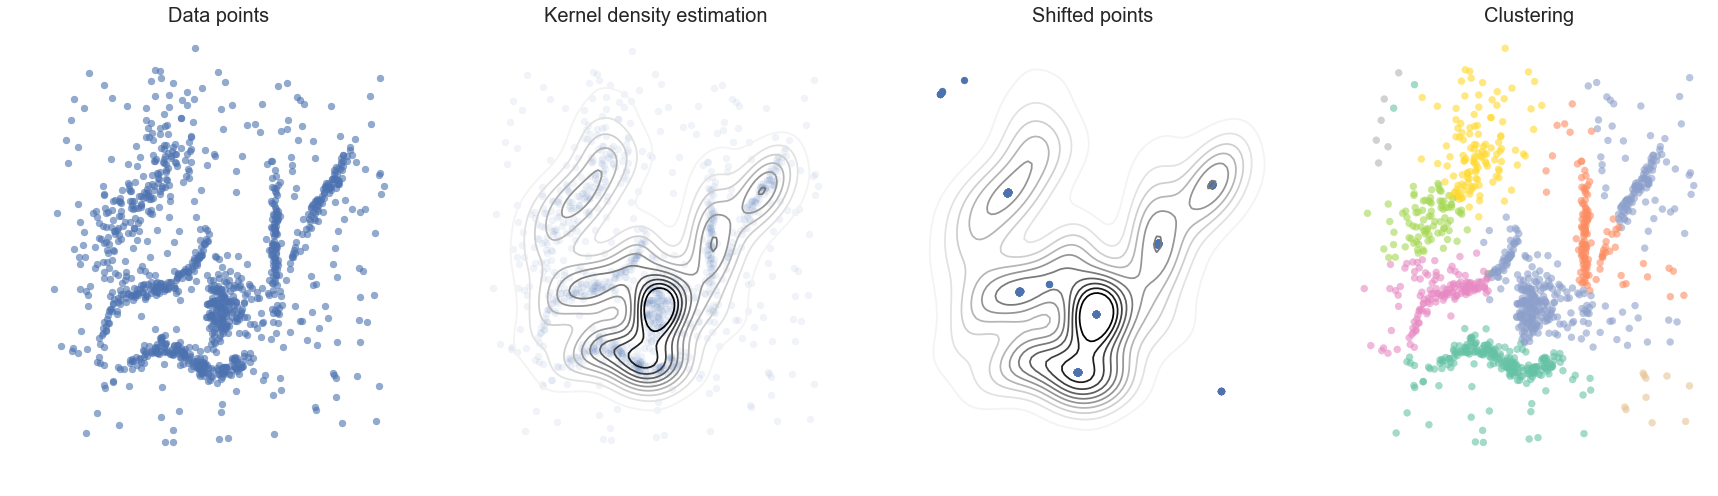

In [5]:
data = fuzzy
bandwidth = 0.25
ms = MeanShift(data, bandwidth)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper.png')

In [6]:
def plot_fuzzy_cmeans(data, labels, Uk, c, save=None, name='images/fuzzypaper.png'):
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    
    
    for i in np.arange(c):
        axarr[1].scatter(data[:,0],data[:,1],alpha=.1,s = np.pi * (15 * Uk[i,:])**2, cmap='Set2')#,c=len(labels)*[i]
    
        axarr[2].scatter(data[np.where( labels==i ),0],data[np.where( labels==i ),1],alpha=.6, cmap='Set2')
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[2].set_title('Hard clustering', fontsize=fontsizeset)
    axarr[1].set_title('Fuzzy clustering', fontsize=fontsizeset)
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

Finished after 0.1827794993755738
29 iterations until termination.
Max within cluster distance to center: 2.618726
Mean within cluster distance to center: 0.492355
Sum of within cluster squared errors: 423.911085


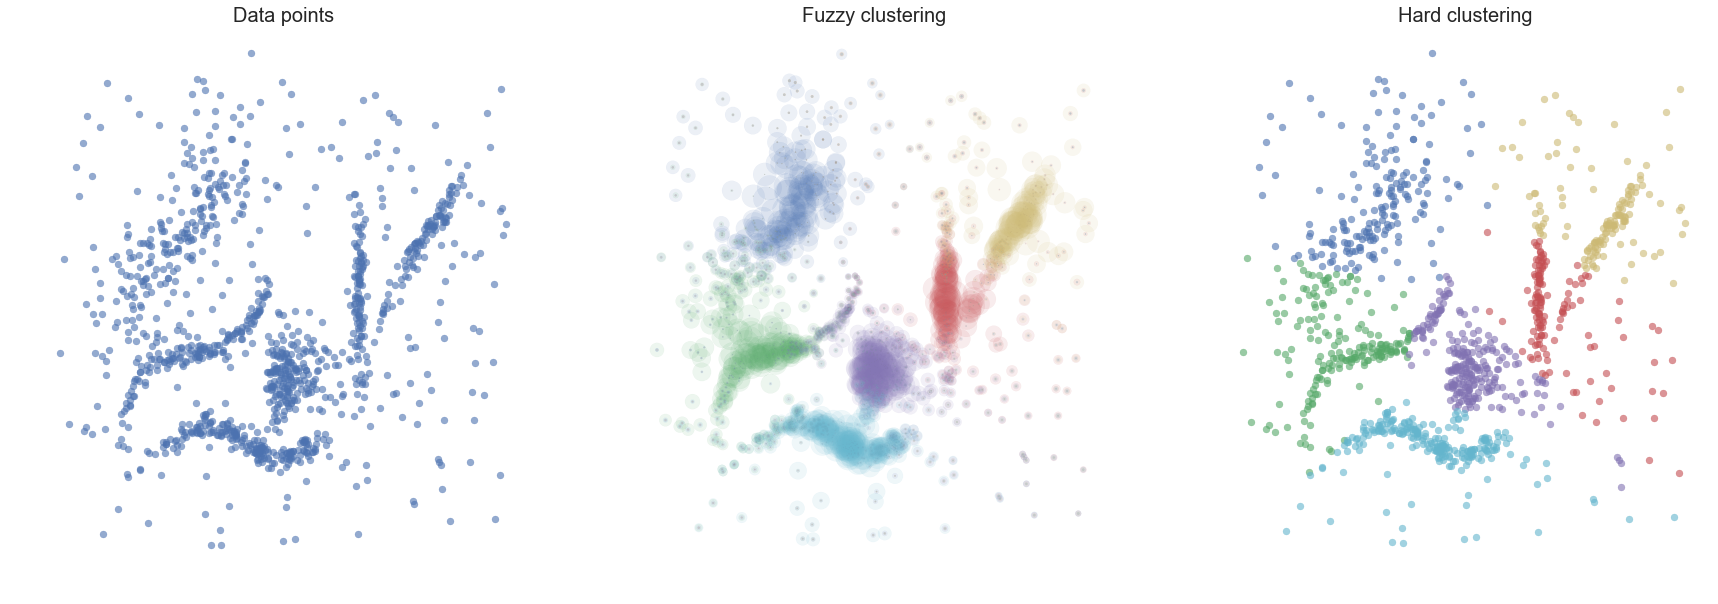

In [7]:
data = fuzzy
c=6
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypaper.png')

Finished after 11.914232003116371
29 iterations until termination.
Max within cluster distance to center: 0.991556
Mean within cluster distance to center: 0.200227
Sum of within cluster squared errors: 669.269623


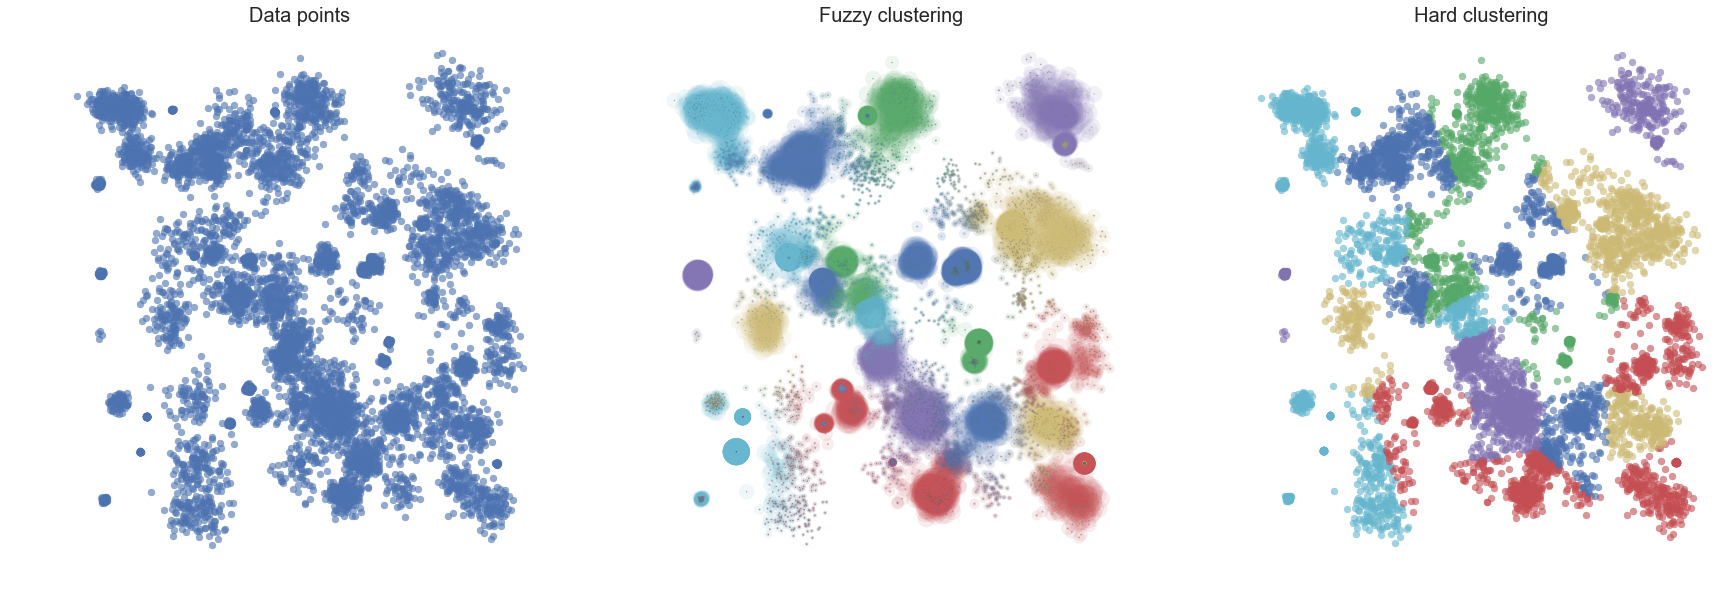

In [8]:
data = load_birch3_data(scale = 'True')
data = data[np.arange(0,100000,10),:2]
c=25
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypaperbirch3.png')

Finished after 2.6148629996420283
29 iterations until termination.
Max within cluster distance to center: 1.494835
Mean within cluster distance to center: 0.268759
Sum of within cluster squared errors: 548.970972


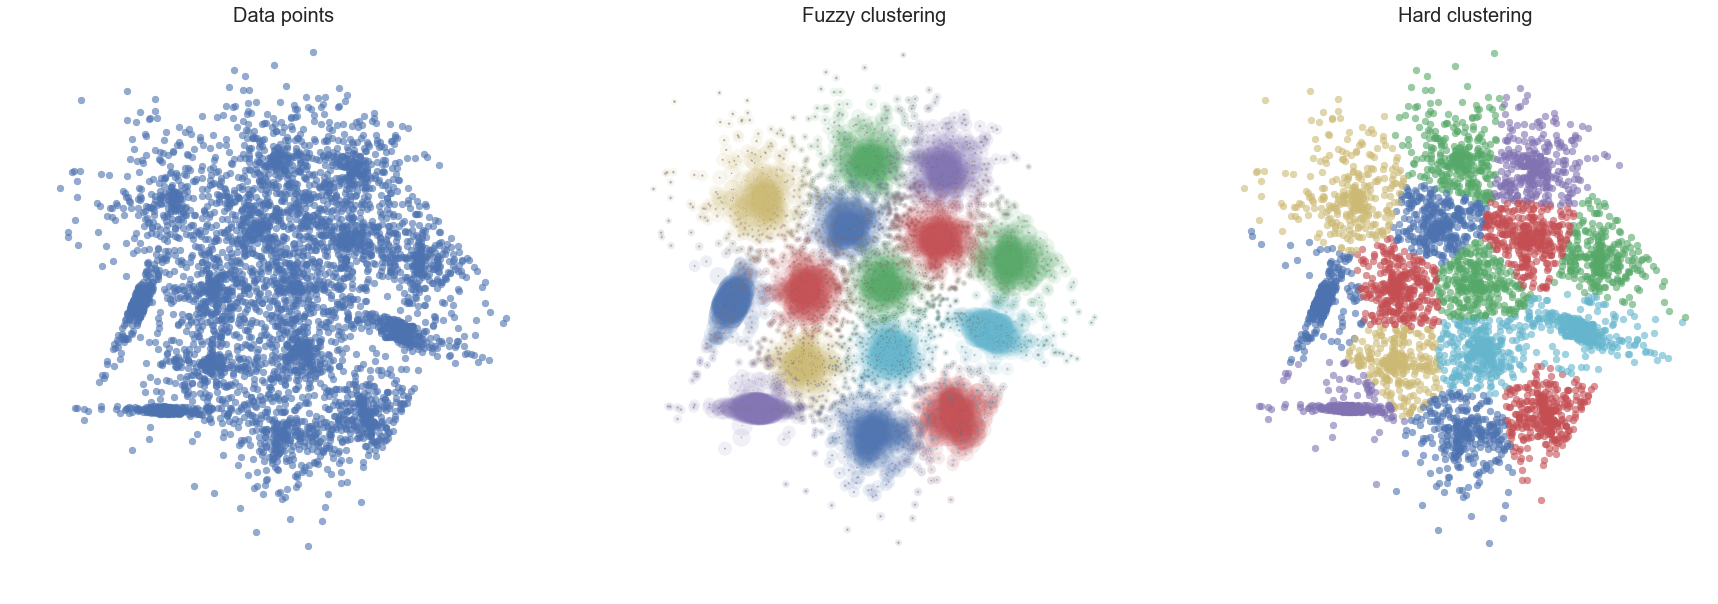

In [9]:
sets=load_sets_data(scale = 'True')
data = sets[:,:2]
c=15
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypapersets.png')